In [1]:
# bar style visuals pred prey sizes

In [2]:
library('dplyr')
library('tidyverse')
library("reshape2")



Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

-- Attaching packages --------------------------------------- tidyverse 1.3.0 --
v ggplot2 3.2.1     v purrr   0.3.4
v tibble  2.1.3     v stringr 1.4.0
v tidyr   1.1.2     v forcats 0.4.0
v readr   1.3.1     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Attaching package: 'reshape2'

The following object is masked from 'package:tidyr':

    smiths



In [256]:
# size table prepped in chapter folder in xlsx and exported to csv
size_table = "..//data//ecopath//group_sizes.csv"
size_df <- read.table(size_table, header =T, sep=",")

# create 'middle' estimate required for boxplot
size_df$log10_pred_size_avg_mm = (size_df$log10_pred_size_min_mm + size_df$log10_pred_size_max_mm) / 2
size_df = size_df %>%
            mutate(group = fct_rev(fct_relevel(group, 
            "NK1-COH", "NK2-CHI", "NK3-FOR","ZF1-ICT", 
            "ZC1-EUP", "ZC2-AMP", "ZC3-DEC", "ZC4-CLG", "ZC5-CSM",  
            "ZS1-JEL", "ZS2-CTH", "ZS3-CHA","ZS4-LAR",
            "PZ1-CIL","PZ2-DIN","PZ3-HNF")))
size_df = size_df %>%
            mutate(type = (fct_relevel(type, 
           "Nekton", "Zoop. Ichthy.","Zoop. Hard","Zoop. Soft","Protozoop.",)))

# matches the food web fig
# https://bookdown.org/hneth/ds4psy/D-3-apx-colors-basics.html
colrs <- c("darkturquoise", "cadetblue","goldenrod2", "plum2","lightskyblue1")


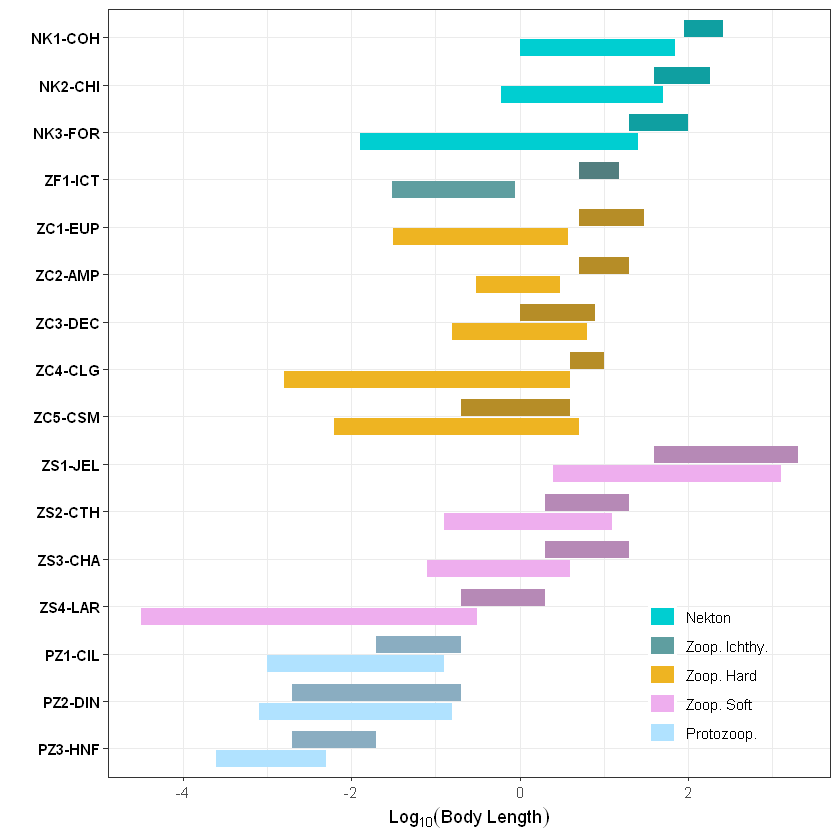

In [268]:


ggplot(data = size_df) +

# pred
geom_segment(aes(x = group,
                   xend = group,
                   y = log10_pred_size_min_mm,
                   yend = log10_pred_size_max_mm,
                   color=type),
               size = 5,
               position = position_nudge(x = 0.2),
               alpha = 1) +

geom_segment(aes(x = group,
                   xend = group,
                   y = log10_pred_size_min_mm,
                   yend = log10_pred_size_max_mm),
               size = 5,
               position = position_nudge(x = 0.2),
               alpha = 0.3,
             color="gray20") +

#prey
geom_segment(aes(x = group,
                 xend = group,
                 y = log10_preysize_min_mm,
                 yend = log10_preysize_max_mm,
                 color=type),
               size = 5,
               position = position_nudge(x = -0.2),
               alpha = 1,
                 ) +
 

xlab(" ") +
theme_bw() +
ylab(bquote(Log[10](Body~Length))) +
theme(legend.position=c(0.84,0.14), 
      legend.title=element_blank(),
      legend.background = element_rect(fill = "transparent", colour = "transparent"), 
      axis.text.y = element_text(size=9, face="bold", colour = "black")) +

scale_color_manual(values=colrs) +
coord_flip() 

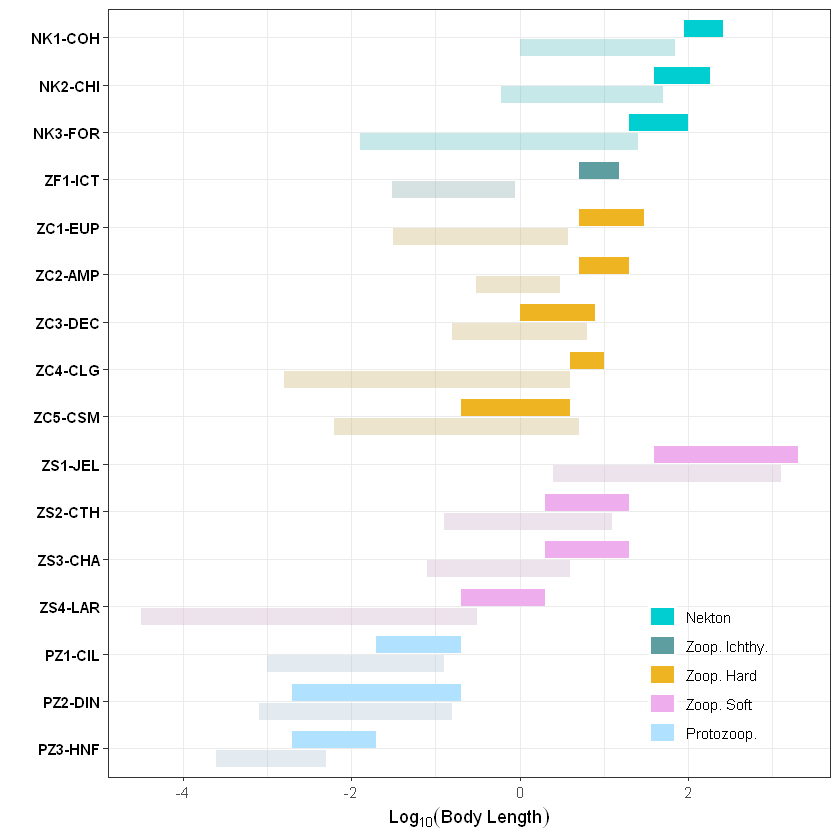

In [289]:
ggplot(data = size_df) +

# pred
geom_segment(aes(x = group,
                   xend = group,
                   y = log10_pred_size_min_mm,
                   yend = log10_pred_size_max_mm,
                   color=type),
               size = 5,
               position = position_nudge(x = 0.2),
               alpha = 1) +



#prey
geom_segment(aes(x = group,
                 xend = group,
                 y = log10_preysize_min_mm,
                 yend = log10_preysize_max_mm,
                 color=type),
               size = 5,
               position = position_nudge(x = -0.2),
               alpha = 0.2,
                 ) +

geom_segment(aes(x = group,
                   xend = group,
                   y = log10_preysize_min_mm,
                   yend = log10_preysize_max_mm),
               size = 5,
               position = position_nudge(x = -0.2),
               alpha = 0.2,
             #linetype="dotted",
             color="gray70") +
 

xlab(" ") +
theme_bw() +
ylab(bquote(Log[10](Body~Length))) +
theme(legend.position=c(0.84,0.14), 
      legend.title=element_blank(),
      legend.background = element_rect(fill = "transparent", colour = "transparent"), 
      axis.text.y = element_text(size=9, face="bold", colour = "black")) +

scale_color_manual(values=colrs) +
coord_flip() 

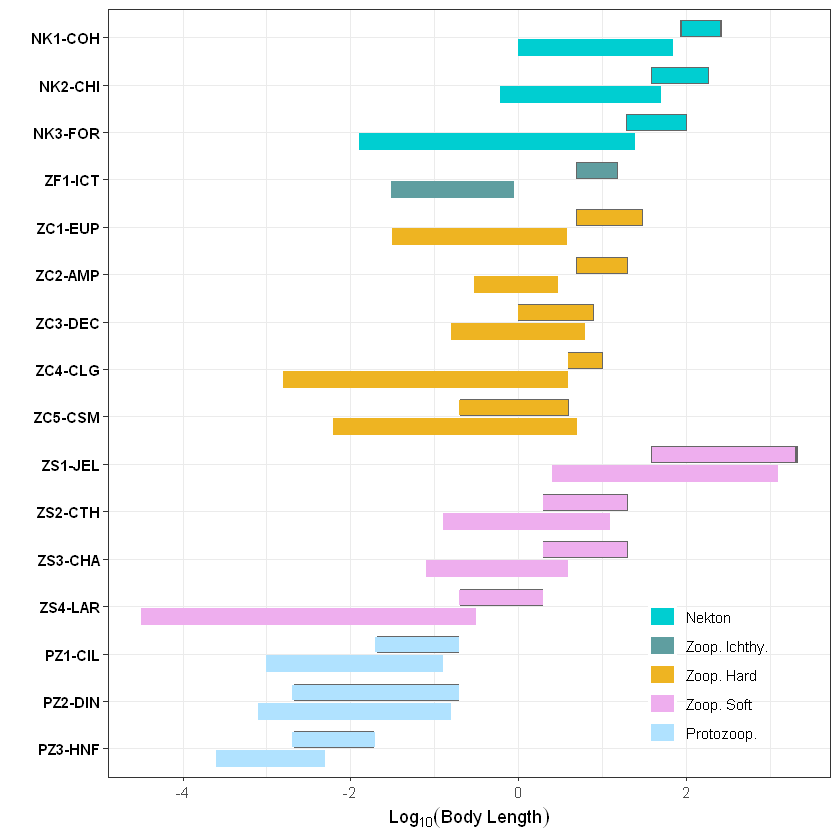

In [275]:
ggplot(data = size_df) +

# pred
geom_segment(aes(x = group,
                   xend = group,
                   y = 0.99* log10_pred_size_min_mm,
                   yend = log10_pred_size_max_mm*1.01),
               size = 5,
               position = position_nudge(x = 0.2),
               alpha = 1,
             color="gray40") +

geom_segment(aes(x = group,
                   xend = group,
                   y = log10_pred_size_min_mm,
                   yend = log10_pred_size_max_mm,
                   color=type),
               size = 4.4,
               position = position_nudge(x = 0.2),
               alpha = 1) +



#prey
geom_segment(aes(x = group,
                 xend = group,
                 y = log10_preysize_min_mm,
                 yend = log10_preysize_max_mm,
                 color=type),
               size = 5,
               position = position_nudge(x = -0.2),
               alpha = 1,
                 ) +
 

xlab(" ") +
theme_bw() +
ylab(bquote(Log[10](Body~Length))) +
theme(legend.position=c(0.84,0.14), 
      legend.title=element_blank(),
      legend.background = element_rect(fill = "transparent", colour = "transparent"), 
      axis.text.y = element_text(size=9, face="bold", colour = "black")) +

scale_color_manual(values=colrs) +
coord_flip() 

In [ ]:
# scrap code

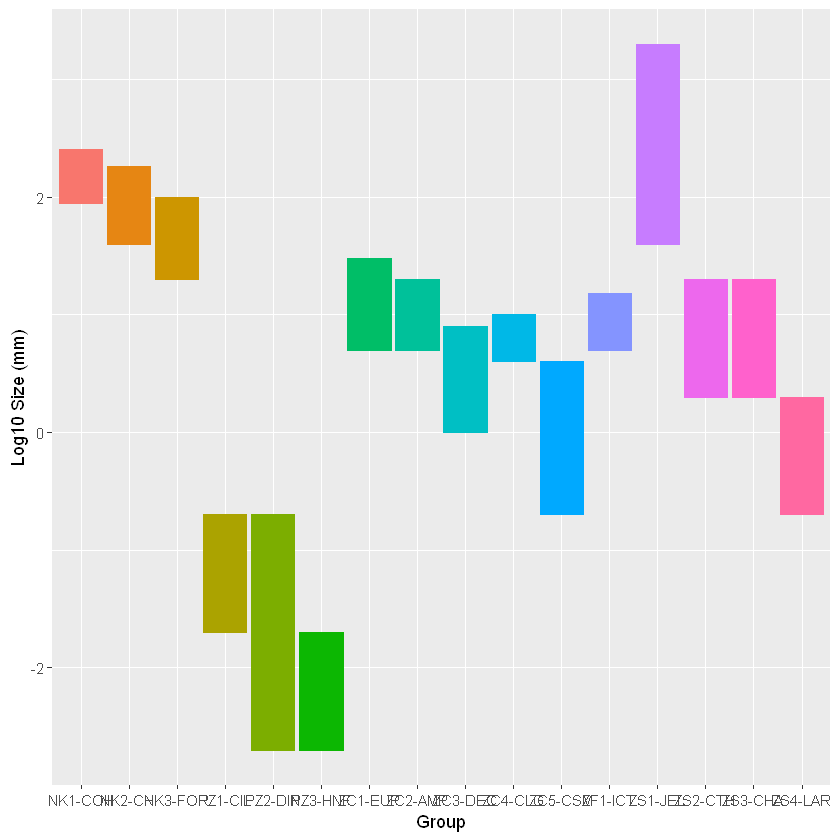

In [78]:
p <- position_dodge(0.8)

ggplot(size_df, aes(x=group,
              ymin = log10_pred_size_min_mm,
              ymax = log10_pred_size_max_mm,
              lower = log10_pred_size_min_mm,
              upper = log10_pred_size_max_mm,
              middle = log10_pred_size_avg_mm,
              fill=group, 
              color=group
                   )
      ) + 
     geom_boxplot(stat = 'identity', show.legend=FALSE) +
     xlab('Group') + 
     ylab('Log10 Size (mm)') #+ 
     #coord_cartesian(ylim = c(-4, 4)) #+
     #coord_flip() 
     #ylim(c(-4, 4)) #+
     #coord_cartesian(xlim = c(-4, 4))
#      geom_crossbar(aes(y = `Mean monthly maximum` ))+
#      geom_crossbar(aes(y = `Mean monthly minimum`)) +
#      geom_crossbar(aes(y = `Mean daily maximum` ))+
#      geom_crossbar(aes(y = `Mean daily minimum`))
# ggplot(mpg, aes(x=class, y=hwy, fill=class)) + 
#     geom_boxplot(alpha=0.3) +
#     theme(legend.position="none") +
#     scale_fill_brewer(palette="Dark2")


#  +
#   scale_fill_manual(breaks = data$group,
#                     values = c("#1b98e0", "#353436", "yellow", "red", "green"))

Using X as id variables


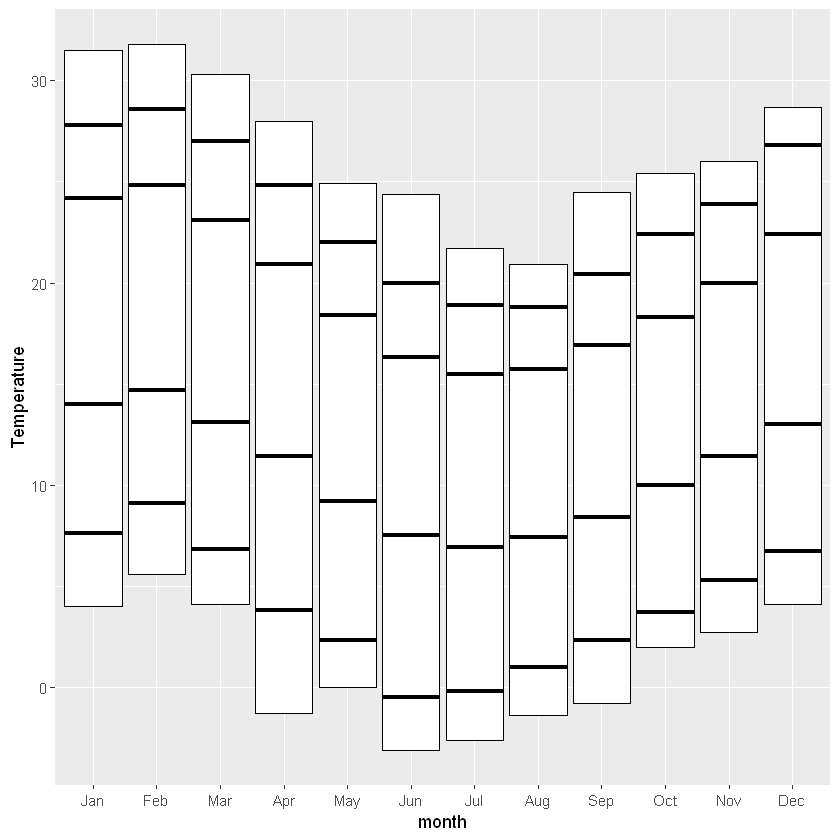

In [3]:
#DEMO

# https://stackoverflow.com/questions/12312189/floating-barcharts
weather <- read.table(text = 'X  Jan  Feb  Mar  Apr  May  Jun  Jul  Aug  Sep  Oct  Nov  Dec
1      "Highest recorded" 31.5 31.8 30.3 28.0 24.9 24.4 21.7 20.9 24.5 25.4 26.0 28.7
2  "Mean monthly maximum" 27.8 28.6 27.0 24.8 22.0 20.0 18.9 18.8 20.4 22.4 23.9 26.8
3    "Mean daily maximum" 24.2 24.8 23.1 20.9 18.4 16.3 15.5 15.7 16.9 18.3 20.0 22.4
4                  "Mean" 19.1 19.8 18.1 16.2 13.8 11.9 11.2 11.6 12.7 14.1 15.7 17.7
5   "Mean daily minimum" 14.0 14.7 13.1 11.4  9.2  7.5  6.9  7.4  8.4 10.0 11.4 13.0
6  "Mean monthly minimum"  7.6  9.1  6.8  3.8  2.3 -0.5 -0.2  1.0  2.3  3.7  5.3  6.7
7       "Lowest recorded"  4.0  5.6  4.1 -1.3  0.0 -3.1 -2.6 -1.4 -0.8  2.0  2.7  4.1', header =T)
w <- dcast(melt(weather), variable~X)


ggplot(w, aes(x=variable,
              ymin = `Lowest recorded`,
              ymax = `Highest recorded`,
              lower = `Lowest recorded`,
              upper = `Highest recorded`,
              middle = `Mean daily maximum`)) + 
     geom_boxplot(stat = 'identity') +
     xlab('month') + 
     ylab('Temperature') +
     geom_crossbar(aes(y = `Mean monthly maximum` ))+
     geom_crossbar(aes(y = `Mean monthly minimum`)) +
     geom_crossbar(aes(y = `Mean daily maximum` ))+
     geom_crossbar(aes(y = `Mean daily minimum`))

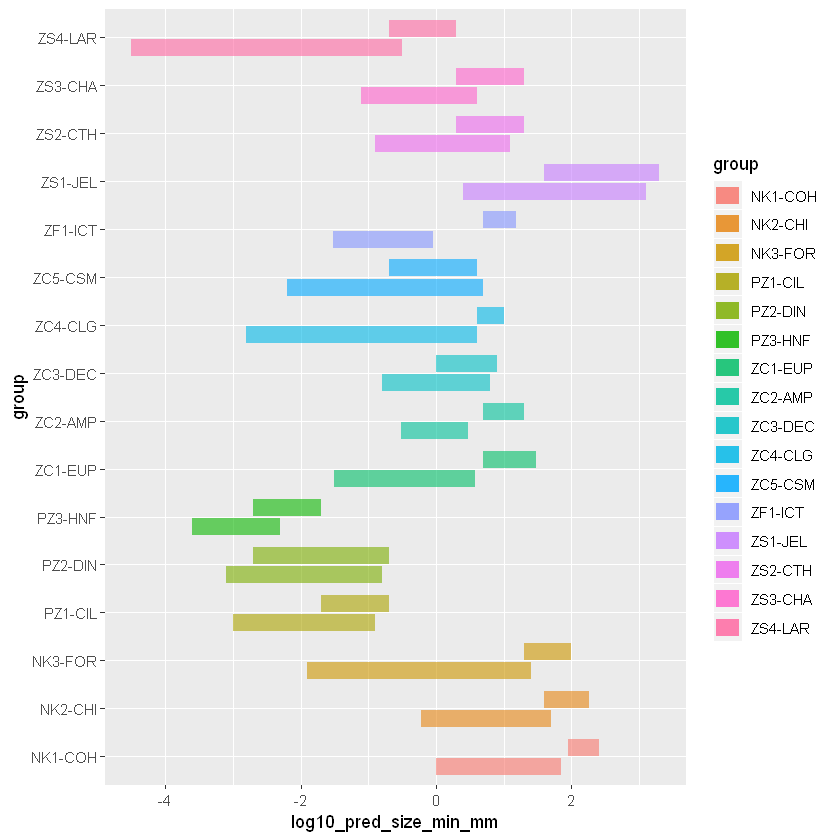

group,pred_size_min_mm,log10_pred_size_min_mm,pred_size_max_mm,log10_pred_size_max_mm,log10_predprey_ratio_min_mm,log10_predprey_ratio_opt_mm,log10_predprey_ratio_max_mm,source,log10_preysize_min_mm,log10_preysize_max_mm,log10_pred_size_avg_mm
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>
NK1-COH,9e+01,1.95,260.00,2.41,0.10,NA,2.40,,0.00,1.85,2.18
NK2-CHI,4e+01,1.60,180.00,2.26,NA,NA,NA,,-0.22,1.70,1.93
NK3-FOR,2e+01,1.30,100.00,2.00,0.60,1.60,3.20,McKinnell & Perry 2016,-1.90,1.40,1.65
ZF1-ICT,5e+00,0.70,15.00,1.18,1.22,1.72,2.22,"Munk, 1992",-1.52,-0.05,0.94
ZC1-EUP,5e+00,0.70,30.00,1.48,0.90,1.55,2.20,"Fuchs & Franks, 2010",-1.50,0.58,1.09
ZC2-AMP,5e+00,0.70,20.00,1.30,NA,NA,NA,,-0.52,0.48,1.00
ZC3-DEC,1e+00,0.00,8.00,0.90,0.50,1.00,1.50,"Fileman, 2014",-0.80,0.80,0.45
ZC4-CLG,4e+00,0.60,10.00,1.00,0.30,1.80,2.80,"Fuchs & Franks, 2010",-2.80,0.60,0.80
ZC5-CSM,2e-01,-0.70,4.00,0.60,0.30,1.80,2.80,"Wirtz, 2012",-2.20,0.70,-0.05
